**1. Постановка задачи**

Рассматривается задача восстановления линейной зависимости вида:
$$y = w \cdot x + b + \epsilon$$
где:

$w$ (weight) — искомый коэффициент наклона;

$b$ (bias) — свободный член (смещение);

$\epsilon$ — случайный шум в данных.

Цель обучения — минимизировать функцию потерь (MSE), которая измеряет среднеквадратичное отклонение предсказаний от реальных ответов:
$$L(w, b) = \frac{1}{n} \sum_{i=1}^{n} (w \cdot x_i + b - y_i)^2$$

**2. Стохастический градиентный спуск (SGD)**

В отличие от классического градиентного спуска (Batch), который вычисляет градиент по всему датасету сразу, SGD обновляет веса после каждого отдельного примера $i$. Это позволяет алгоритму:

1. Быстрее начинать обучение на больших данных.

2. Вносить шум  в процесс обновления, что помогает избегать неглубоких локальных минимумов.

Формула обновления весов:

$$w_{new} = w_{old} - \eta \cdot \frac{\partial L}{\partial w}$$
$$b_{new} = b_{old} - \eta \cdot \frac{\partial L}{\partial b}$$

Где $\eta$ (learning rate) — шаг обучения.

**3. Затухание скорости обучения (Learning Rate Decay)**

Использование постоянного шага $\eta$ в SGD часто приводит к тому, что вблизи минимума веса начинают скакать и не могут зафиксироваться в оптимальной точке из-за шума в данных. Для решения этой проблемы применяется LR Decay, стратегия постепенного уменьшения шага обучения от эпохи к эпохе. В текущей задаче используется формула:

$$\eta_t = \frac{\eta_0}{1 + k \cdot t}$$

Где:$\eta_t$ — скорость обучения на текущей эпохе $t$;

$\eta_0$ — начальная скорость (0.1);

$k$ — коэффициент затухания (0.01).

**4. Производные функции потерь**

Для реализации алгоритма необходимы частные производные MSE по параметрам модели для одного примера $(x_i, y_i)$:

1. По весу $w$: $\frac{\partial L}{\partial w} = 2 \cdot x_i \cdot (w \cdot x_i + b - y_i)$

2. По смещению $b$: $\frac{\partial L}{\partial b} = 2 \cdot (w \cdot x_i + b - y_i)$

**5. Алгоритм решения**

1. Инициализация: Задаем начальные веса ($w=5, b=5$) и параметры обучения.

2. Цикл по эпохам: Вычисляем текущий lr. Перемешиваем данные.

3. Внутренний цикл по объектам:
- Считаем предсказание $\hat{y}$.
- Вычисляем градиенты.
- Обновляем $w$ и $b$.

4. Логирование: Сохраняем значение Loss для каждой эпохи для визуализации сходимости.

Финальные параметры: w = -1.6086, b = 2.0432
Финальный loss: 0.035268


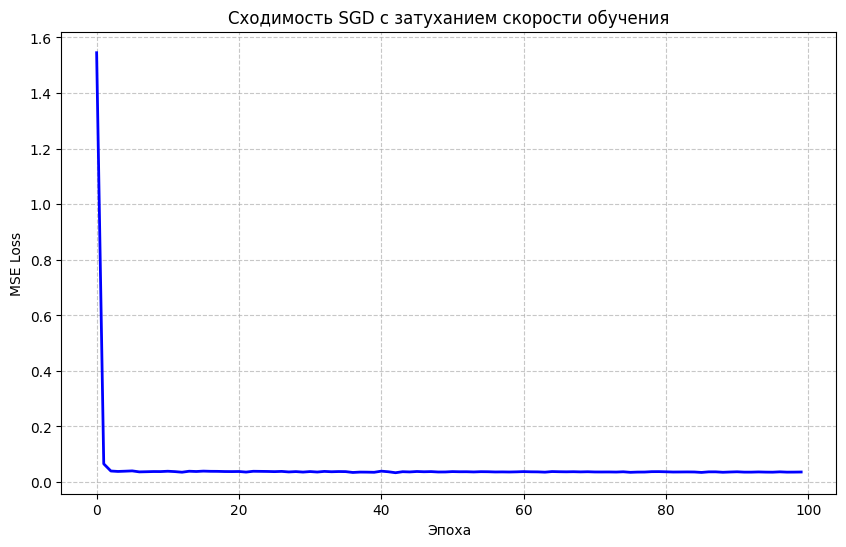

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Генерация данных
np.random.seed(42)
n_samples = 100
x = np.random.rand(n_samples)
noise = np.random.randn(n_samples) * 0.2
y = -1.5 * x + 2 + noise

# Начальные параметры
w, b = 5.0, 5.0
lr0 = 0.1
decay_rate = 0.01
epochs = 100

loss_history = []

# 2, 3 Реализация SGD с затуханием (Learning Rate Decay)
for epoch in range(epochs):
    # Обновление скорости обучения по формуле
    lr = lr0 / (1 + decay_rate * epoch)
    
    # Перемешиваем индексы
    indices = np.random.permutation(n_samples)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    epoch_loss = 0

    for i in range(n_samples):
        xi = x_shuffled[i]
        yi = y_shuffled[i]
        
        # Предсказание и ошибка
        y_pred = w * xi + b
        error = y_pred - yi
        epoch_loss += error**2
        
        # Градиенты для MSE (производная по w и b)
        # L = (w*x + b - y)^2 
        # dL/dw = 2*x*(w*x + b - y)
        grad_w = 2 * xi * error
        grad_b = 2 * error
        
        # Обновление весов
        w -= lr * grad_w
        b -= lr * grad_b
        
    loss_history.append(epoch_loss / n_samples)

# Вывод результатов
print(f"Финальные параметры: w = {w:.4f}, b = {b:.4f}")
loss = loss_history[-1]
print(f"Финальный loss: {loss:.6f}")

# 4. Построение графика сходимости
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history, color='blue', lw=2)
plt.title('Сходимость SGD с затуханием скорости обучения')
plt.xlabel('Эпоха')
plt.ylabel('MSE Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()